## 基本資訊

In [2]:
import pandas as pd 
train = pd.read_csv('../pubg-finish-placement-prediction/train_V2.csv')
test = pd.read_csv('../pubg-finish-placement-prediction/test_V2.csv')
print('Train data: \nRows: {}\nCols: {}'.format(train.shape[0],train.shape[1]))
print(train.columns)
print('\nTest data: \nRows: {}\nCols: {}'.format(test.shape[0],test.shape[1]))
print(test.columns)

Train data: 
Rows: 4446966
Cols: 29
Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

Test data: 
Rows: 1934174
Cols: 28
Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints'],
      dtype='object')


In [29]:
for c in ['Id','groupId','matchId']:
    print(f'unique [{c}] count:', train[c].nunique())

unique [Id] count: 4446965
unique [groupId] count: 2026744
unique [matchId] count: 47964


## 各變數四分位數分布狀況

In [20]:
import numpy as np
train.describe(include=np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.0000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.0000,33.0
damageDealt,130.717167,170.780629,0.0,0.0,84.2400,186.0000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.0000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.0000,64.0
heals,1.370148,2.679982,0.0,0.0,0.0000,2.0000,80.0
killPlace,47.599361,27.462931,1.0,24.0,47.0000,71.0000,101.0
killPoints,505.006156,627.504921,0.0,0.0,0.0000,1172.0000,2170.0
kills,0.924784,1.558445,0.0,0.0,0.0000,1.0000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.0000,20.0


In [34]:
#numGroups与maxPlace匹配 不匹配
for q in ['numGroups == maxPlace','numGroups != maxPlace']:
    print(q, ':', len(train.query(q)))
# 不匹配的原因大概率是机器人的存在

numGroups == maxPlace : 1241089
numGroups != maxPlace : 3205876


## MatchType 分布

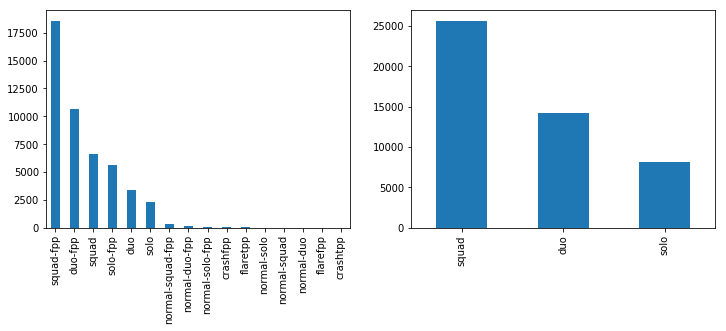

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

'''
solo  <-- solo,solo-fpp,normal-solo,normal-solo-fpp
duo   <-- duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp
squad <-- squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp
'''
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

In [33]:
import itertools
def toTapleList(list1,list2):
    return list(itertools.product(list1,list2))
# describe
cols = ['numGroups','maxPlace']
desc1 = train.groupby('matchType')[cols].describe()[toTapleList(cols,['min','mean','max'])]
# groups in match
group = train.groupby(['matchType','matchId','groupId']).count().groupby(['matchType','matchId']).size().to_frame('groups in match')
desc2 = group.groupby('matchType').describe()[toTapleList(['groups in match'],['min','mean','max'])]

pd.concat([desc1, desc2], axis=1)

numGroups                   maxPlace                    \
                min       mean    max      min       mean    max   
matchType                                                          
duo             1.0  45.812482   52.0      3.0  47.608919   52.0   
solo            1.0  91.115282  100.0      2.0  93.908900  100.0   
squad           2.0  27.039389   37.0      2.0  27.982982   37.0   

          groups in match                    
                      min       mean    max  
matchType                                    
duo                   1.0  45.348777   52.0  
solo                  1.0  85.679886  100.0  
squad                 2.0  26.834984   37.0

## 補給品(boosts) 與治療(Heels)

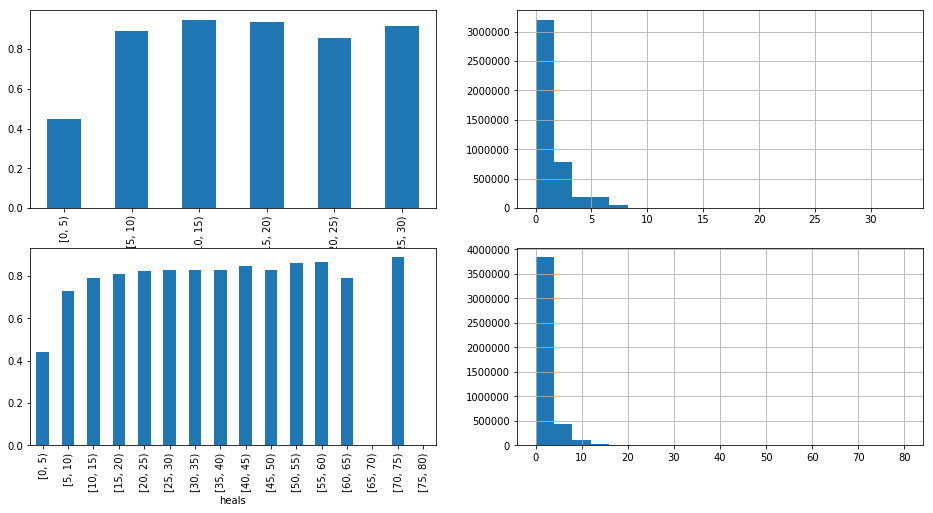

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

cols = ['boosts','heals']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    mv = (sub[col].max() // 5) + 1
    sub[col] = pd.cut(sub[col], [5*x for x in range(0,mv)], right=False)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
    train[col].hist(bins=20, ax=ax[1])

## 復活

In [36]:
print('solo player has revives:', 'solo' in train.query('revives > 0')['matchType'].unique())

solo player has revives: False


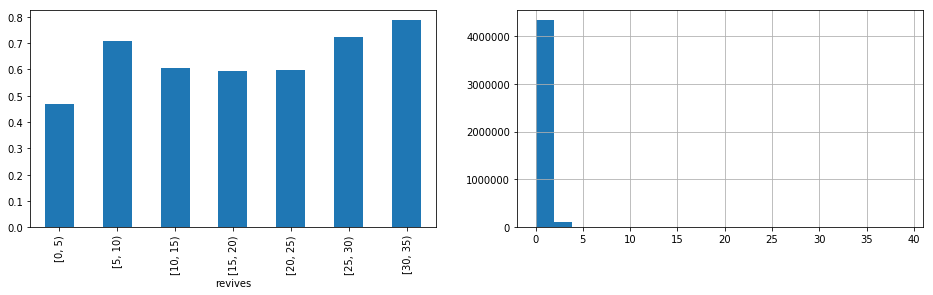

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
col = 'revives'
sub = train.loc[~train['matchType'].str.contains('solo'),['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], [5*x for x in range(0,8)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20, ax=ax[1])

## KillPlace

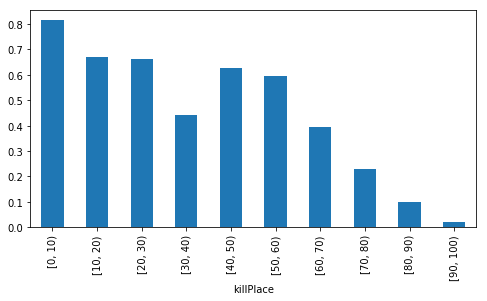

In [39]:
plt.figure(figsize=(8,4))
col = 'killPlace'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], [10*x for x in range(0,11)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar()

In [40]:
''' important : killPlace is a sorted ranking of kills and winPlacePerc in each match 
'''
subMatch = train[train['matchId'] == train['matchId'].min()].sort_values(['winPlacePerc','killPlace'])
cols = ['groupId','kills','winPlacePerc','killPlace']
subMatch[cols]

,groupId,kills,winPlacePerc,killPlace
3895898,3a6addfa0df938,0,0.000,94
3599150,3a6addfa0df938,0,0.000,95
4367296,236ab9e9c081b9,0,0.037,88
4131025,236ab9e9c081b9,0,0.037,89
3088817,236ab9e9c081b9,0,0.037,90
...,...,...,...,...
1303528,ca058240046b4c,6,0.963,3
3637258,ca058240046b4c,5,0.963,6
2351120,ca058240046b4c,1,0.963,24
2848198,4d1bbbc19b9084,5,1.000,5


## Kill

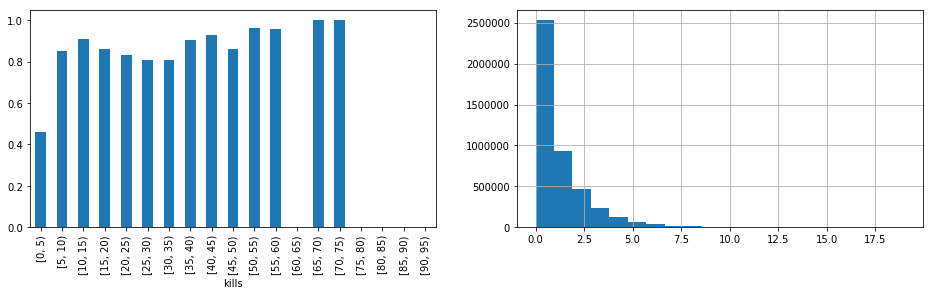

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
col = 'kills'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], [5*x for x in range(0,20)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[train['kills'] < 20][col].hist(bins=20, ax=ax[1])

In [44]:
sub = train['matchType'].str.contains('solo')
pd.concat([train.loc[sub].groupby('matchId')['kills'].sum().describe(),
         train.loc[~sub].groupby('matchId')['kills'].sum().describe()], keys=['solo','team'], axis=1).T

,count,mean,std,min,25%,50%,75%,max
solo,8094.0,83.420558,27.592399,0.0,84.0,89.0,92.0,786.0
team,39870.0,86.212039,17.268987,0.0,83.0,87.0,90.0,687.0


## Distance

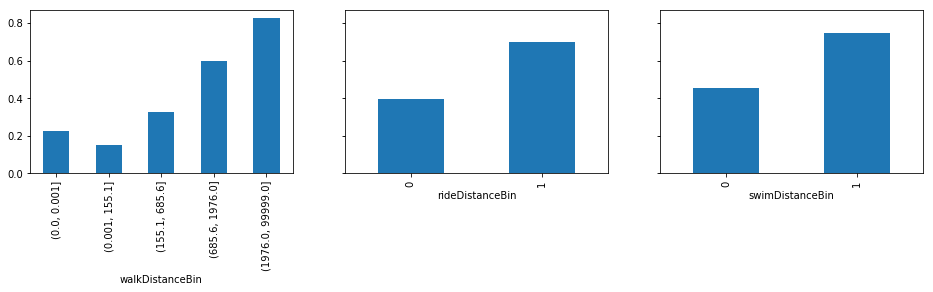

In [45]:
sub = train[['walkDistance','rideDistance','swimDistance','winPlacePerc']].copy()
walk = train['walkDistance']
sub['walkDistanceBin'] = pd.cut(walk, [0, 0.001, walk.quantile(.25), walk.quantile(.5), walk.quantile(.75), 99999])
sub['rideDistanceBin'] = (train['rideDistance'] > 0).astype(int)
sub['swimDistanceBin'] = (train['swimDistance'] > 0).astype(int)

fig, ax = plt.subplots(1, 3, figsize=(16, 3), sharey=True)
sub.groupby('walkDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[0])
sub.groupby('rideDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[1])
sub.groupby('swimDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[2])
del sub, walk

## Zombie

In [46]:
sub = train.query('walkDistance == 0 & kills == 0 & weaponsAcquired == 0 & \'solo\' in matchType')
print('count:', len(sub), ' winPlacePerc:', round(sub['winPlacePerc'].mean(),3))

count: 18154  winPlacePerc: 0.053


## Cheater

In [47]:
sq = 'kills > 3 & (headshotKills / kills) >= 0.8'
sub = train.query(sq)
print(sq, '\n count:', len(sub), ' winPlacePerc:', round(sub['winPlacePerc'].mean(),3))

kills > 3 & (headshotKills / kills) >= 0.8 
 count: 3859  winPlacePerc: 0.824


## Missing Value in Target

In [3]:
print("Missing values in Train data")
for x in train.columns:
    if train[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x,train[x].isnull().values.ravel().sum()))

print("Missing values in Test data")
for x in test.columns:
    if test[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x,test[x].isnull().values.ravel().sum()))
        
train.dropna(inplace=True)

Missing values in Train data
winPlacePerc - 1
Missing values in Test data


## Correlation Matrix

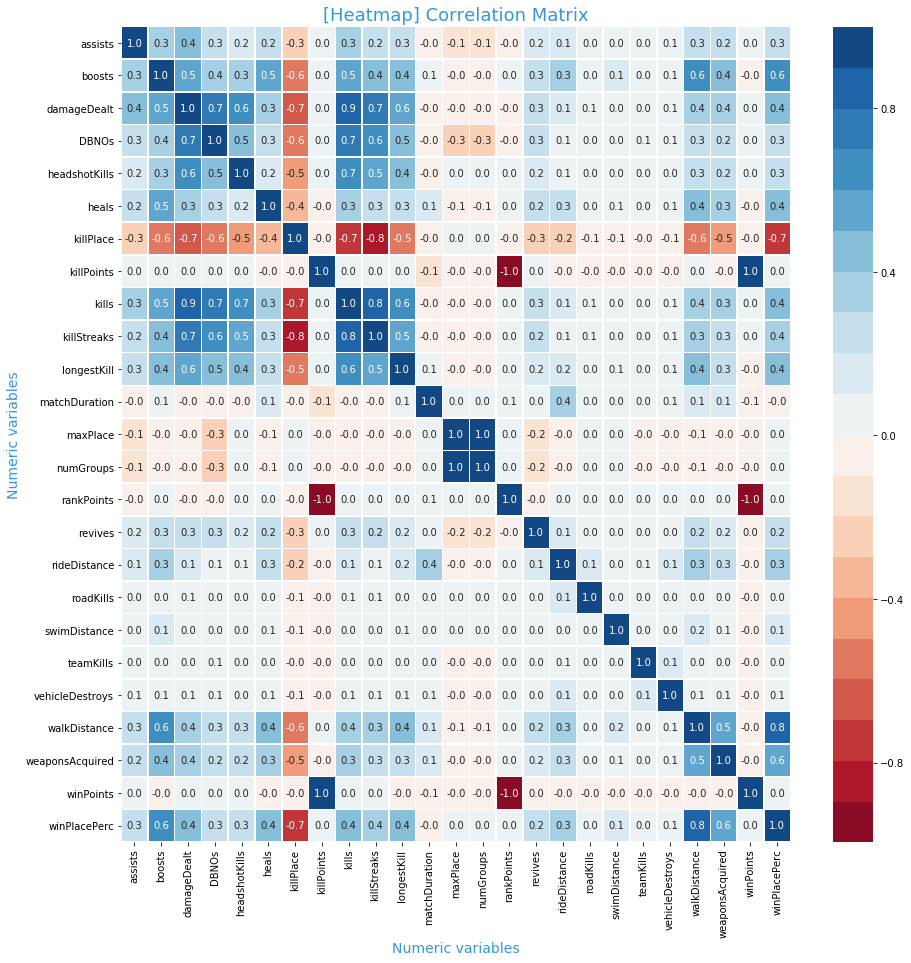

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("RdBu", 20))

ax.set_xlabel('Numeric variables', size=14, color="#3498DB")
ax.set_ylabel('Numeric variables', size=14, color="#3498DB")
ax.set_title('[Heatmap] Correlation Matrix', size=18, color="#3498DB")

plt.show()

## Match Summary

In [48]:
cols = ['kills','teamKills','DBNOs','revives','assists','boosts','heals','damageDealt',
    'walkDistance','rideDistance','swimDistance','weaponsAcquired']

aggs = ['count','min','mean','max']
# summary of solo-match
grp = train.loc[train['matchType'].str.contains('solo')].groupby('matchId')
grpSolo = grp[cols].sum()
# summary of team-match
grp = train.loc[~train['matchType'].str.contains('solo')].groupby('matchId')
grpTeam = grp[cols].sum()

pd.concat([grpSolo.describe().T[aggs], grpTeam.describe().T[aggs]], keys=['solo', 'team'], axis=1)

solo                                       team       \
                  count    min          mean          max    count  min   
kills            8094.0    0.0     83.420558     786.0000  39870.0  0.0   
teamKills        8094.0    0.0      1.022856      15.0000  39870.0  0.0   
DBNOs            8094.0    0.0      0.000000       0.0000  39870.0  0.0   
revives          8094.0    0.0      0.000000       0.0000  39870.0  0.0   
assists          8094.0    0.0      5.541636     219.0000  39870.0  0.0   
boosts           8094.0    0.0     94.372992     182.0000  39870.0  0.0   
heals            8094.0    0.0     90.302570     395.0000  39870.0  0.0   
damageDealt      8094.0  100.0  10610.827830   80991.2000  39870.0  0.0   
walkDistance     8094.0    0.0  85067.164231  156265.7110  39870.0  0.0   
rideDistance     8094.0    0.0  41250.584695  207528.6269  39870.0  0.0   
swimDistance     8094.0    0.0    452.993113    5222.3500  39870.0  0.0   
weaponsAcquired  8094.0    4.0    320.018903    1860.0000  39870.0  0.0   

                                            
                          mean         max  
kills                86.212039     687.000  
teamKills             2.454552      76.000  
DBNOs                73.377226     669.000  
revives              18.365513      81.000  
assists              24.953925     275.000  
boosts              104.302132     227.000  
heals               134.489315     424.000  
damageDealt       12425.649044   68960.340  
walkDistance     111468.120108  216150.870  
rideDistance      59229.835472  370542.200  
swimDistance        410.992660    9829.961  
weaponsAcquired     343.311537    1666.000

In [49]:
grpSolo.nlargest(5, 'kills')

,kills,teamKills,DBNOs,revives,assists,boosts,heals,damageDealt,walkDistance,rideDistance,swimDistance,weaponsAcquired
matchId,,,,,,,,,,,,
cfa2775c9ef944,786,1,0,0,185,0,395,80991.2,15327.69,17631.7,0.0,1860
fe7043ee6221c8,691,2,0,0,219,18,53,67722.7,19284.92,8599.5,0.0,1497
e024bf51bf1799,516,3,0,0,159,0,60,52742.7,14045.65,7914.8,0.0,1109
f900de1ec39fa5,415,1,0,0,151,0,42,40134.0,8468.61,8739.5,0.0,877
5921b55b9e96b5,387,0,0,0,110,0,56,40473.0,11463.26,4915.0,0.0,837


In [50]:
grpTeam.nlargest(5, 'kills')

,kills,teamKills,DBNOs,revives,assists,boosts,heals,damageDealt,walkDistance,rideDistance,swimDistance,weaponsAcquired
matchId,,,,,,,,,,,,
6680c7c3d17d48,687,7,0,0,232,60,134,65617.10,11311.930,8454.95,0.0,1558
8a728def0644be,656,1,669,35,258,0,277,68960.34,27110.521,17190.26,0.0,1558
6bf647ecee30da,638,12,0,0,157,1,236,64173.06,67684.248,33173.24,0.0,1666
25830709cb9033,628,3,0,0,181,0,296,65856.80,49591.730,32569.00,0.0,1553
17dea22cefe62a,583,3,0,0,181,4,102,61720.80,15640.520,20187.86,0.0,1348


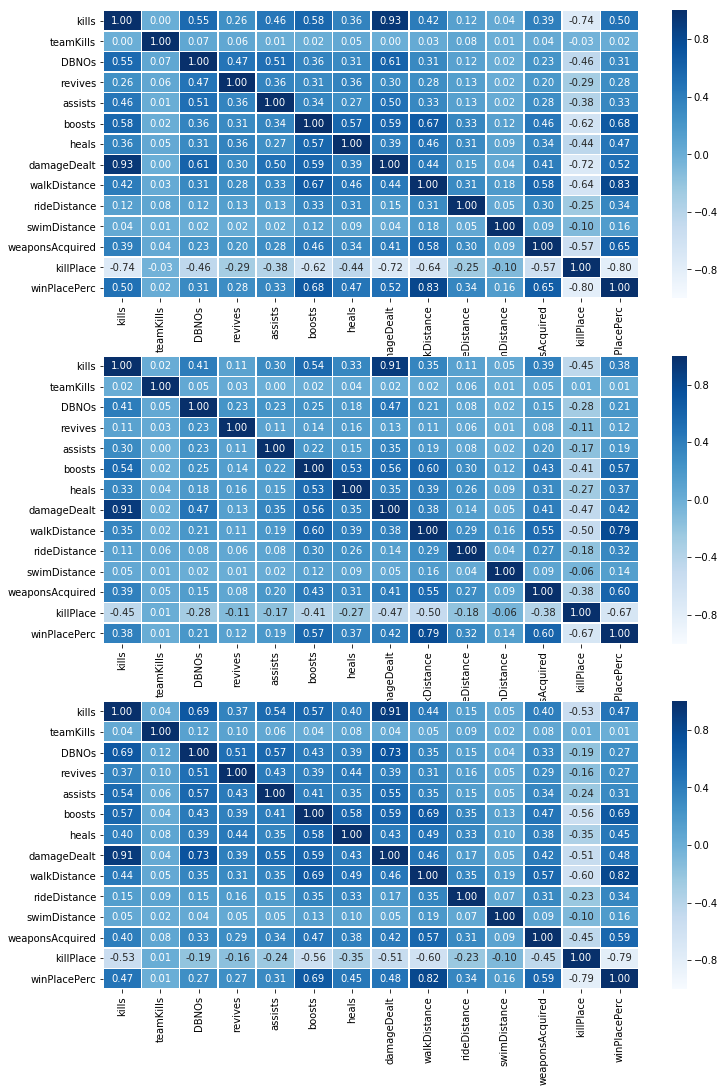

In [51]:
cols = ['kills','teamKills','DBNOs','revives','assists','boosts','heals','damageDealt',
    'walkDistance','rideDistance','swimDistance','weaponsAcquired']
cols.extend(['killPlace','winPlacePerc'])
group = train.groupby(['matchId','groupId'])[cols]

fig, ax = plt.subplots(3, 1, figsize=(12, 18), sharey=True)
for df, ax in zip([group.mean(), group.min(), group.max()], ax.ravel()):
    sns.heatmap(df.corr(), annot=True, linewidths=.6, fmt='.2f', vmax=1, vmin=-1, center=0, cmap='Blues', ax=ax)

del df

## 殺手

In [52]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


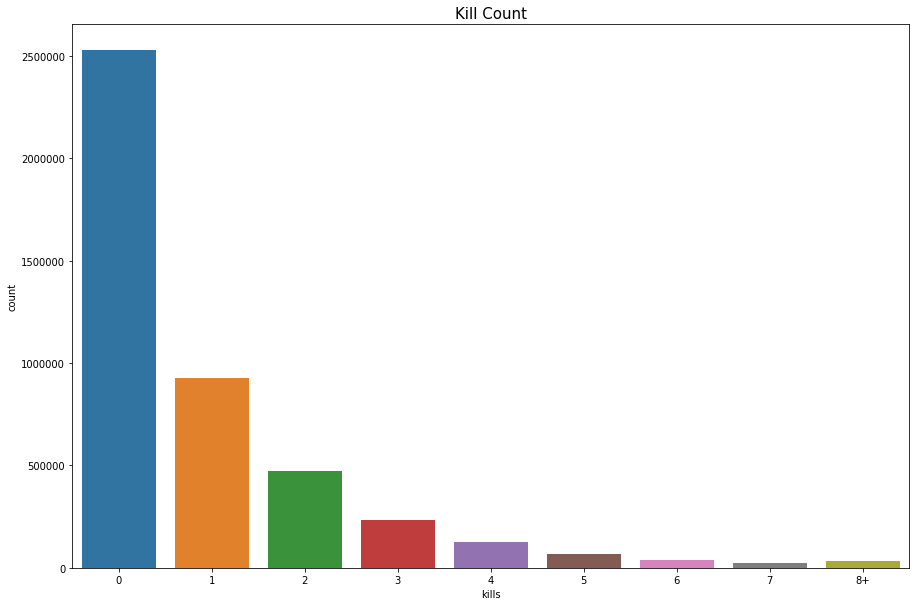

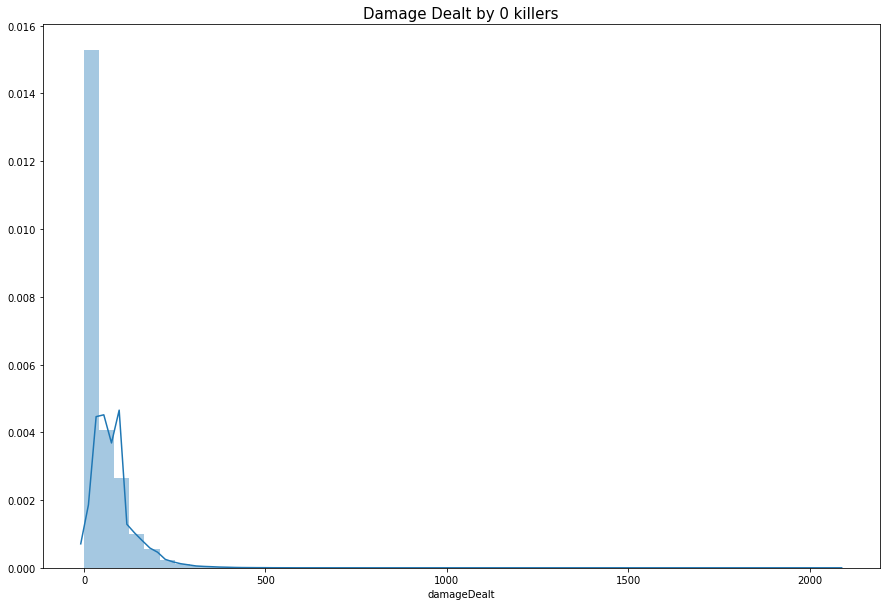

In [53]:
# Kills
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

#Damages
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

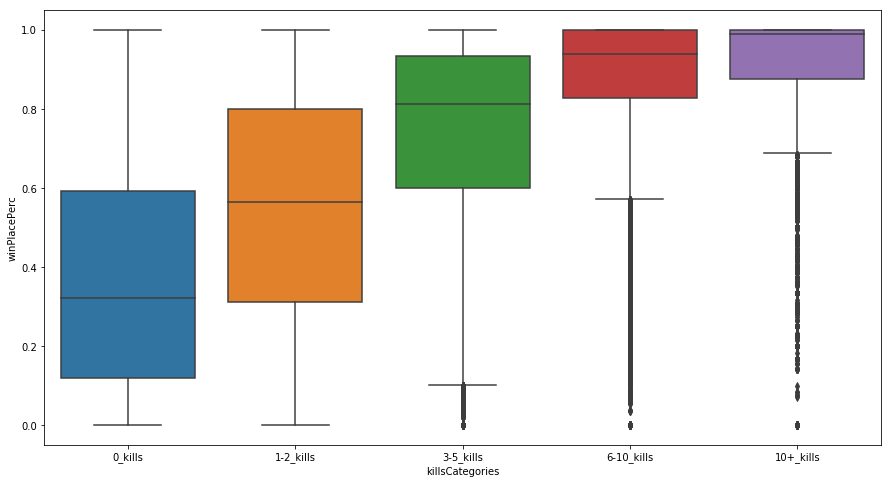

In [54]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

In [57]:
import plotly.graph_objs as go
from plotly.offline import plot
data = train[['kills']].copy()

data.loc[data['kills'] > data['kills'].quantile(0.99)] = 8
temp1 = data['kills'].value_counts(sort=False).reset_index()
temp2 = data['kills'].value_counts(sort=False, normalize=True).reset_index()
temp2['kills'] = temp2['kills'] * 100

temp = pd.merge(temp1,temp2,how='inner',on='index')
temp['cum'] = temp['kills_y'].cumsum()
temp.loc[temp['index']==8, 'index'] = '8+'
temp['index'] = temp['index'].map(str) + " kills"

trace1 = dict(type='bar',
    x=temp['index'],
    y=temp['kills_x'],
    marker=dict(
        color='#2196F3'
    ),
    name='Number of kills',
    opacity=0.8
)

trace2 = dict(type='scatter',
    x=temp['index'],
    y=temp['cum'],
    marker=dict(
        color='#263238'
    ),
    line=dict(
        color= '#263238', 
        width= 1.5),
    name='Cumulative % of Players',
    xaxis='x1', 
    yaxis='y2' 
)

data = [trace1, trace2]

layout = go.Layout(
    title='[Pareto Analysis] Kills vs % of Players',
    legend= dict(orientation="h"),
    yaxis=dict(
        range=[0,2625000],
        title='Number of Kills',
        titlefont=dict(
            color="#2196F3"
        )
    ),
    yaxis2=dict(
        title='Cumulative % of Players',
        titlefont=dict(
            color='#263238'
        ),
        range=[0,105],
        overlaying='y',
        anchor='x',
        side='right'
        )
    )

from plotly.offline import plot
fig = go.Figure(data=data, layout=layout)
plot(fig, filename="pareto")

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `pareto` didn't end with .html. Adding .html to the end of your file.



'pareto.html'

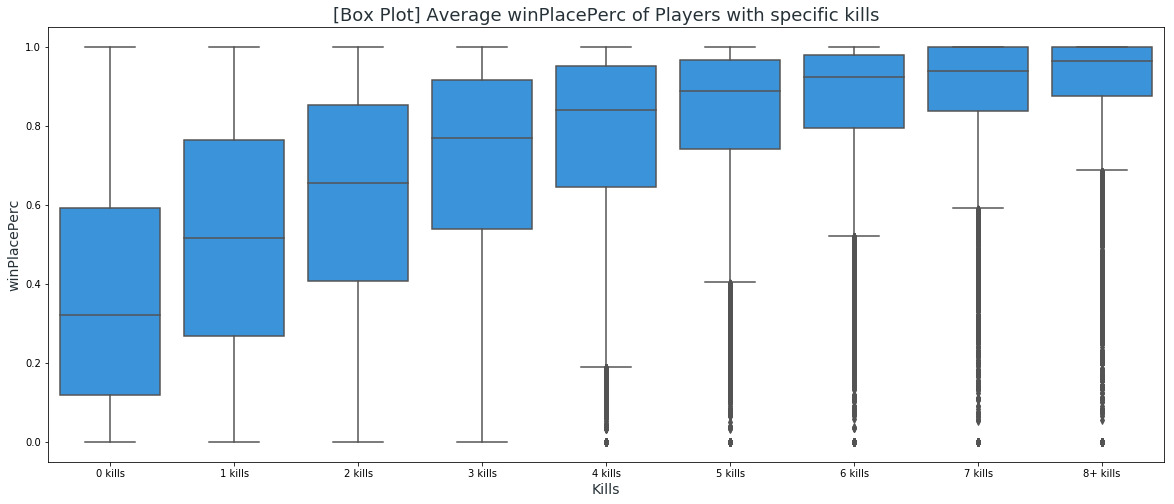

In [21]:
data = train[['kills','winPlacePerc']].copy()
data.loc[data['kills'] > data['kills'].quantile(0.99), 'kills'] = '8+'
data['kills'] = data['kills'].map(str) + " kills"
x_order = data.groupby('kills').mean().reset_index()['kills']

fig, ax = plt.subplots(figsize=(20,8))
a = sns.boxplot(x='kills', y='winPlacePerc', data=data, ax=ax, color="#2196F3", order=x_order)
ax.set_xlabel('Kills', size=14, color="#263238")
ax.set_ylabel('winPlacePerc', size=14, color="#263238")
ax.set_title('[Box Plot] Average winPlacePerc of Players with specific kills', size=18, color="#263238")
plt.show()

## Healers

In [58]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}."
      .format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}."
      .format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


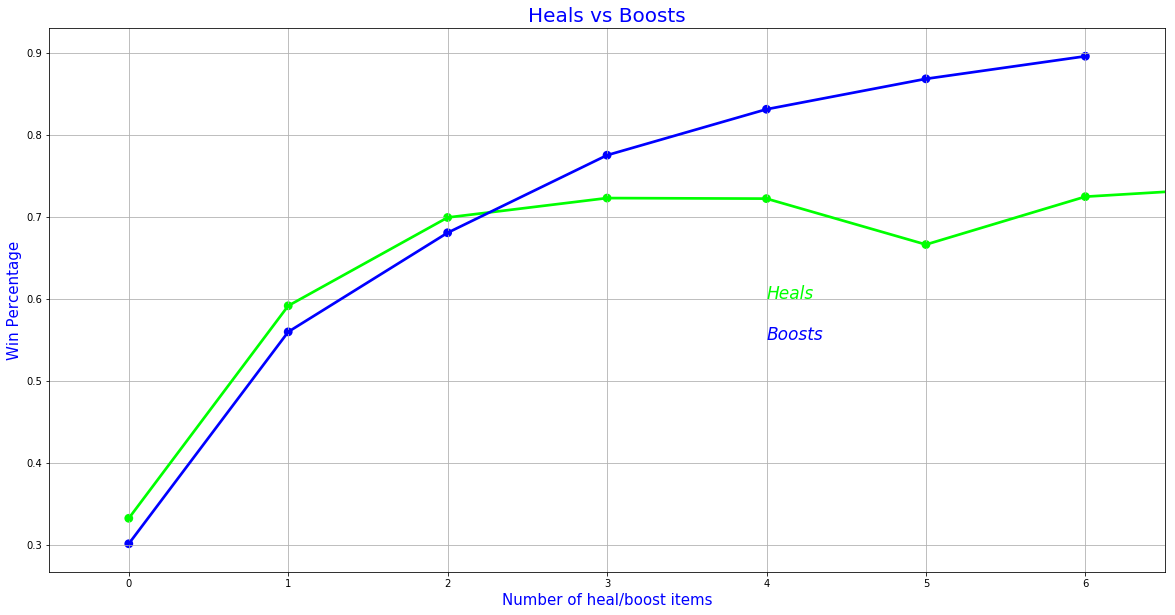

In [60]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

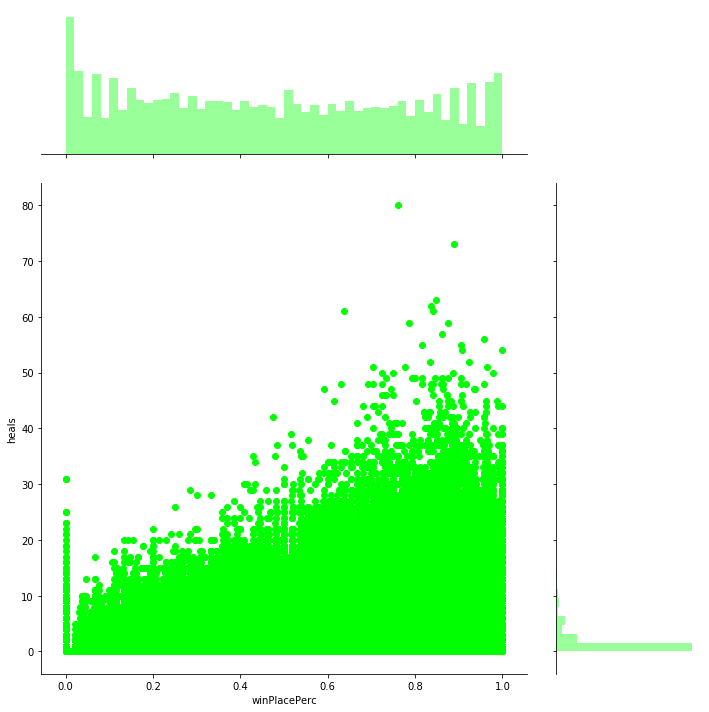

In [61]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")
plt.show()

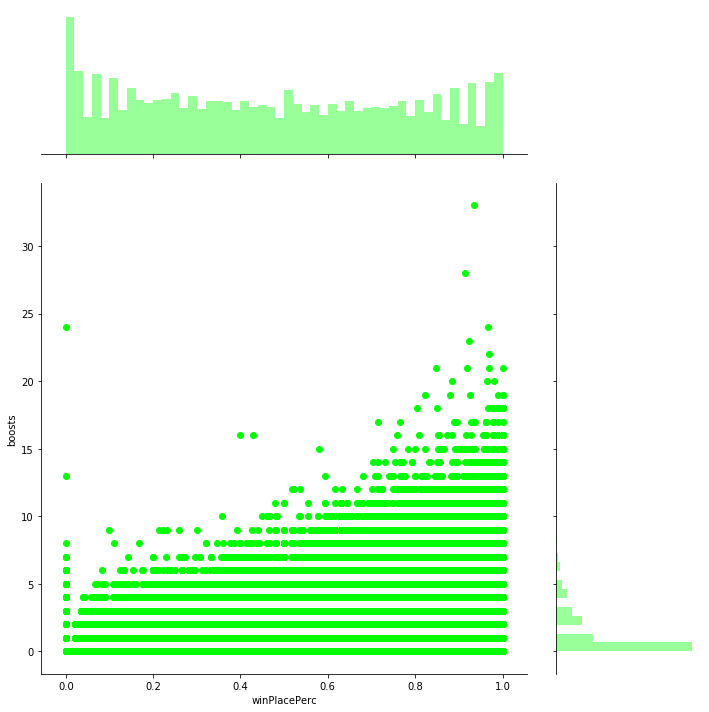

In [62]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="lime")
plt.show()

## Runners

In [63]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m."
      .format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

The average person walks for 1154.2m, 99% of people have walked 4396.0m or less, while the marathoner champion walked for 25780.0m.


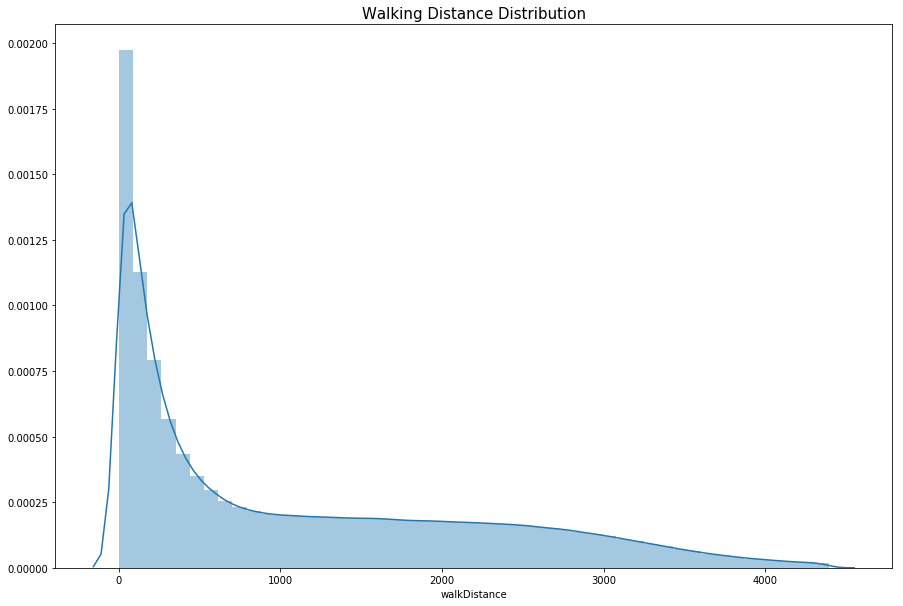

In [64]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

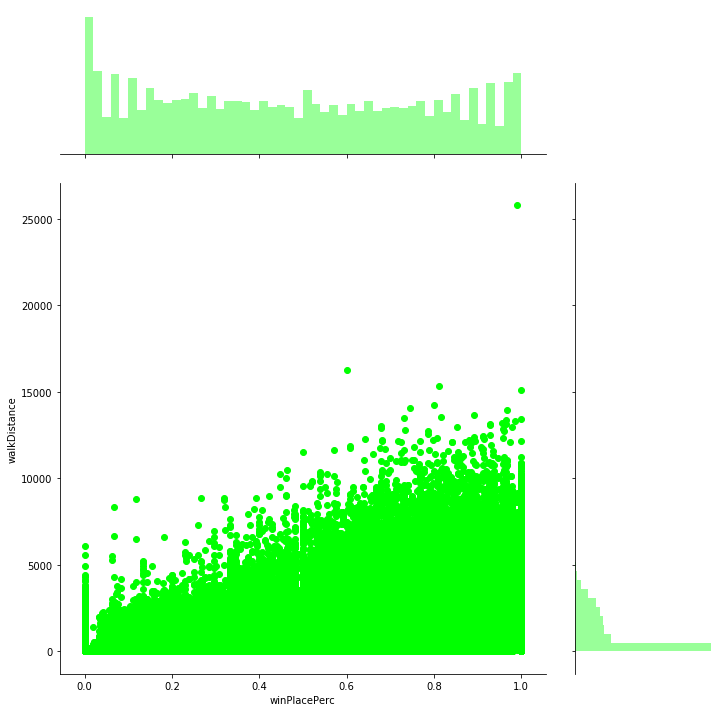

In [65]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="lime")
plt.show()

## Drivers

In [66]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m."
      .format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

The average person drives for 606.1m, 99% of people have drived 6966.0m or less, while the formula 1 champion drived for 40710.0m.


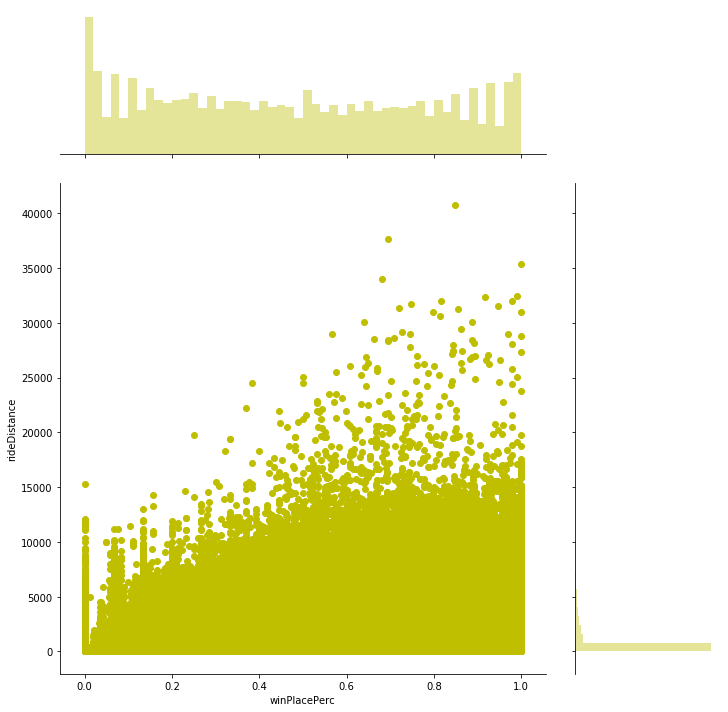

In [67]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color="y")
plt.show()

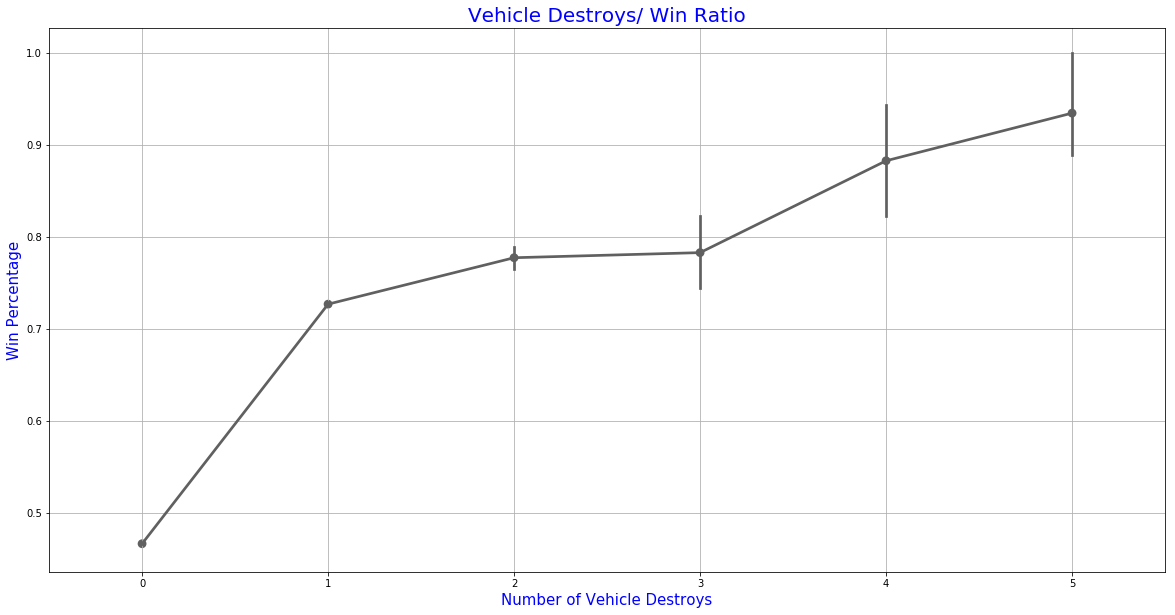

In [68]:
# 破壞車輛 (有強大武器)
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

## Swimmer

In [69]:
print("The average person swims for {:.1f}m, 99% of people have swimemd {}m or less, while the olympic champion swimmed for {}m."
      .format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

The average person swims for 4.5m, 99% of people have swimemd 123.0m or less, while the olympic champion swimmed for 3823.0m.


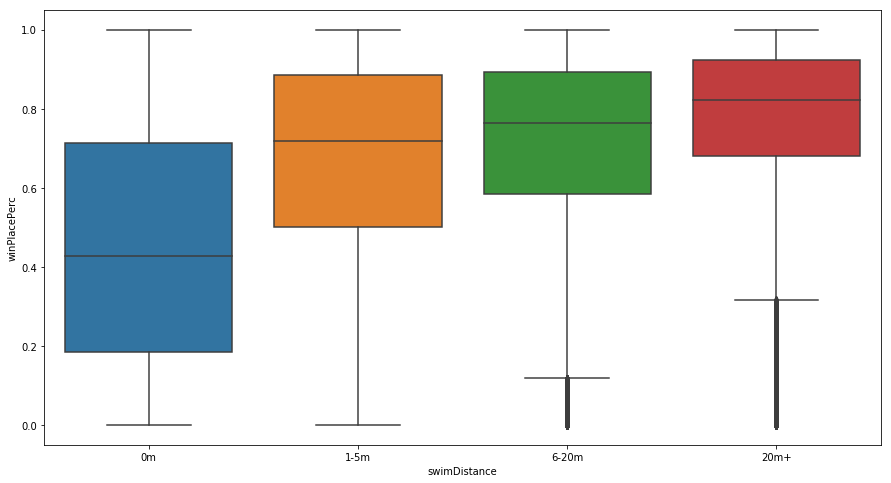

In [70]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

## Others

99th percentile of walk distance is 4396.0m


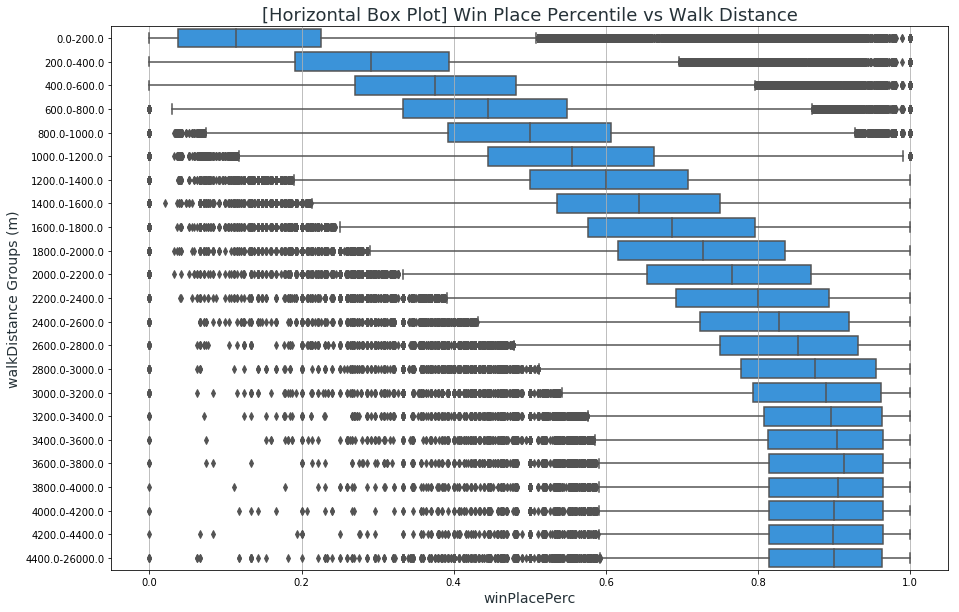

In [22]:
kills = train[['walkDistance','winPlacePerc']].copy()

print("99th percentile of walk distance is {}m".format(kills['walkDistance'].quantile(0.99)))

cut_range = np.linspace(0,4400,23)
cut_range = np.append(cut_range, 26000)
kills['walkDistanceGrouping'] = pd.cut(kills['walkDistance'],
                                 cut_range,
                                 labels=["{}-{}".format(a_, b_) for a_, b_ in zip(cut_range[:23], cut_range[1:])],
                                 include_lowest=True
                                )

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="winPlacePerc", y="walkDistanceGrouping", data=kills, ax=ax, color="#2196F3")
ax.set_xlabel('winPlacePerc', size=14, color="#263238")
ax.set_ylabel('walkDistance Groups (m)', size=14, color="#263238")
ax.set_title('[Horizontal Box Plot] Win Place Percentile vs Walk Distance', size=18, color="#263238")
plt.gca().xaxis.grid(True)
plt.show()

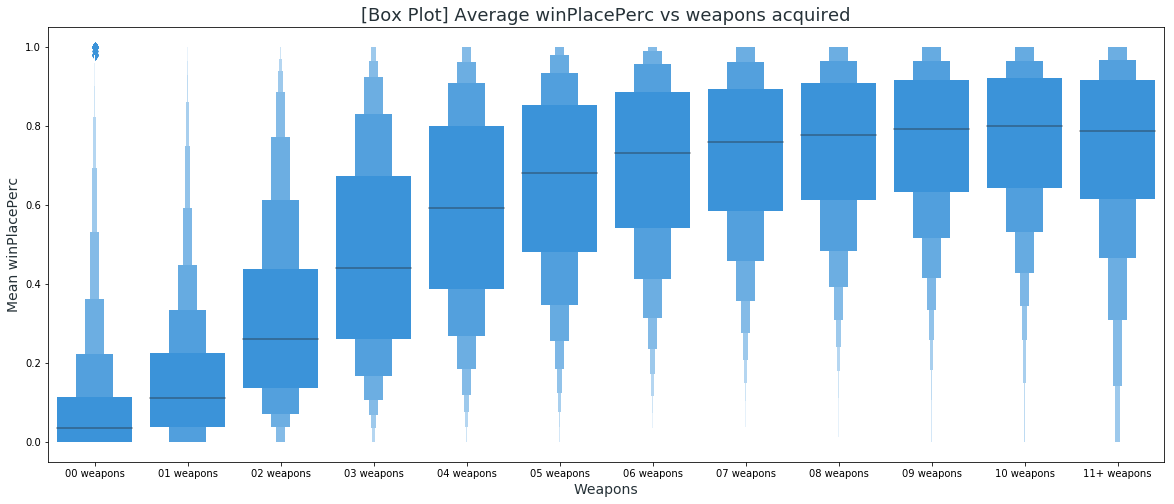

In [23]:
weapons = train[['weaponsAcquired','winPlacePerc']].copy()
weapons.loc[weapons['weaponsAcquired'] > weapons['weaponsAcquired'].quantile(0.99), 'weaponsAcquired'] = '11+'
weapons['weaponsAcquired'] = weapons.weaponsAcquired.apply(lambda x: '0' + str(x) if isinstance(x,int) and x<10 else x) 
weapons['weaponsAcquired'] = weapons['weaponsAcquired'].map(str) + " weapons"
x_order = weapons.groupby('weaponsAcquired').mean().reset_index()['weaponsAcquired']

fig, ax = plt.subplots(figsize=(20,8))
a = sns.boxenplot(x='weaponsAcquired', y='winPlacePerc', data=weapons, ax=ax, color="#2196F3", order=x_order)
ax.set_xlabel('Weapons', size=14, color="#263238")
ax.set_ylabel('Mean winPlacePerc', size=14, color="#263238")
ax.set_title('[Box Plot] Average winPlacePerc vs weapons acquired', size=18, color="#263238")
plt.show()

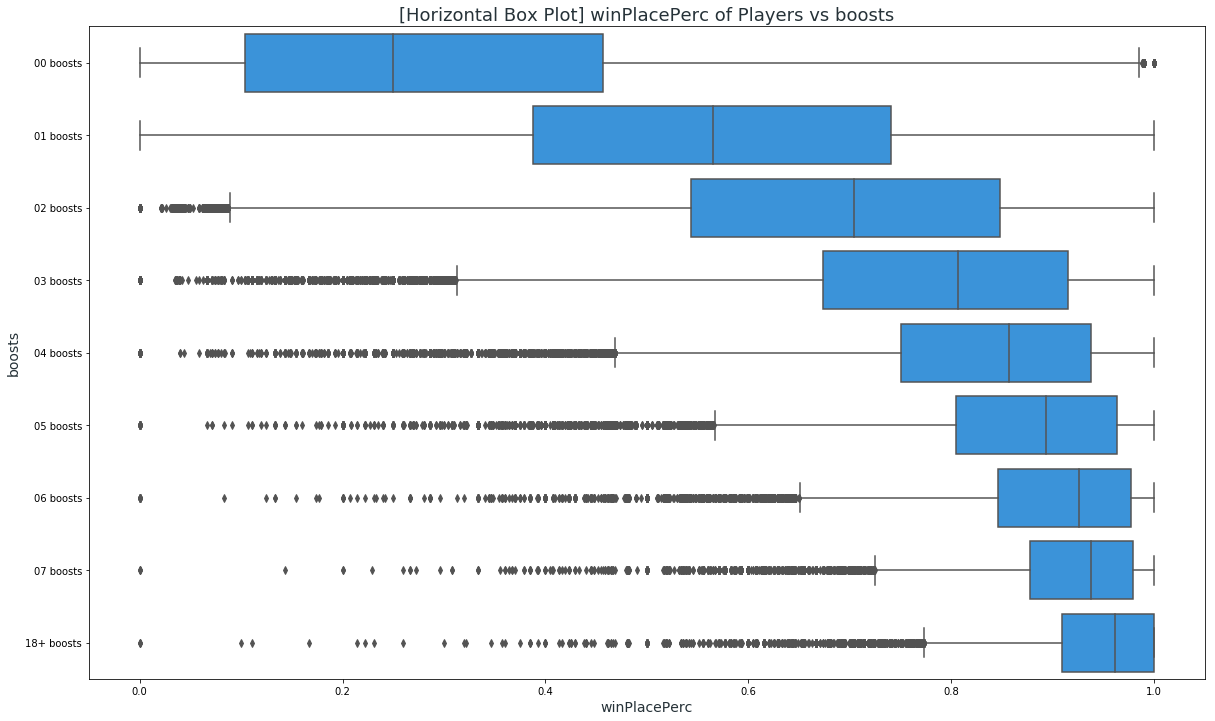

In [27]:
data = train[['boosts','winPlacePerc']].copy()
data.loc[data['boosts'] > data['boosts'].quantile(0.99), 'boosts'] = '18+'
data['boosts'] = data.boosts.apply(lambda x: '0' + str(x) if isinstance(x,int) and x<10 else x) 
data['boosts'] = data['boosts'].map(str) + " boosts"
x_order = data.groupby('boosts').mean().reset_index()['boosts']

fig, ax = plt.subplots(figsize=(20,12))
a = sns.boxplot(x='winPlacePerc', y='boosts', data=data, ax=ax, color="#2196F3", order=x_order)
ax.set_ylabel('boosts', size=14, color="#263238")
ax.set_xlabel('winPlacePerc', size=14, color="#263238")
ax.set_title('[Horizontal Box Plot] winPlacePerc of Players vs boosts', size=18, color="#263238")
plt.show()

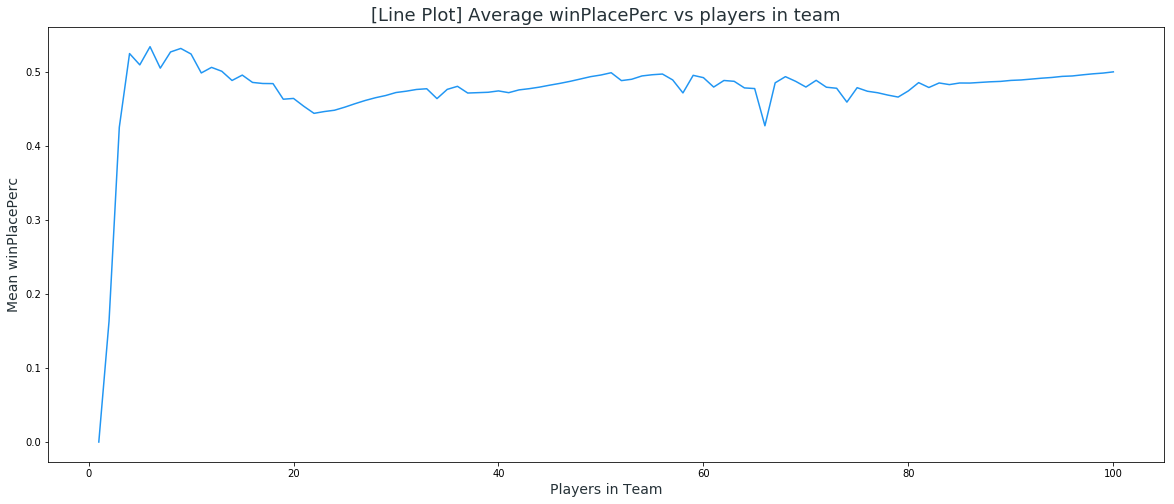

In [28]:
train['players_in_team'] = 

temp = train[['players_in_team','winPlacePerc']].copy()
temp = temp.groupby('players_in_team').mean().reset_index()

fig, ax = plt.subplots(figsize=(20,8))
a = sns.lineplot(x='players_in_team', y='winPlacePerc', data=temp, ax=ax, color="#2196F3")
ax.set_xlabel('Players in Team', size=14, color="#263238")
ax.set_ylabel('Mean winPlacePerc', size=14, color="#263238")
ax.set_title('[Line Plot] Average winPlacePerc vs players in team', size=18, color="#263238")
plt.show()

In [71]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games."
      .format(len(solos), 100*len(solos)/len(train), len(duos)
              , 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442528 (9.95%) squad games.


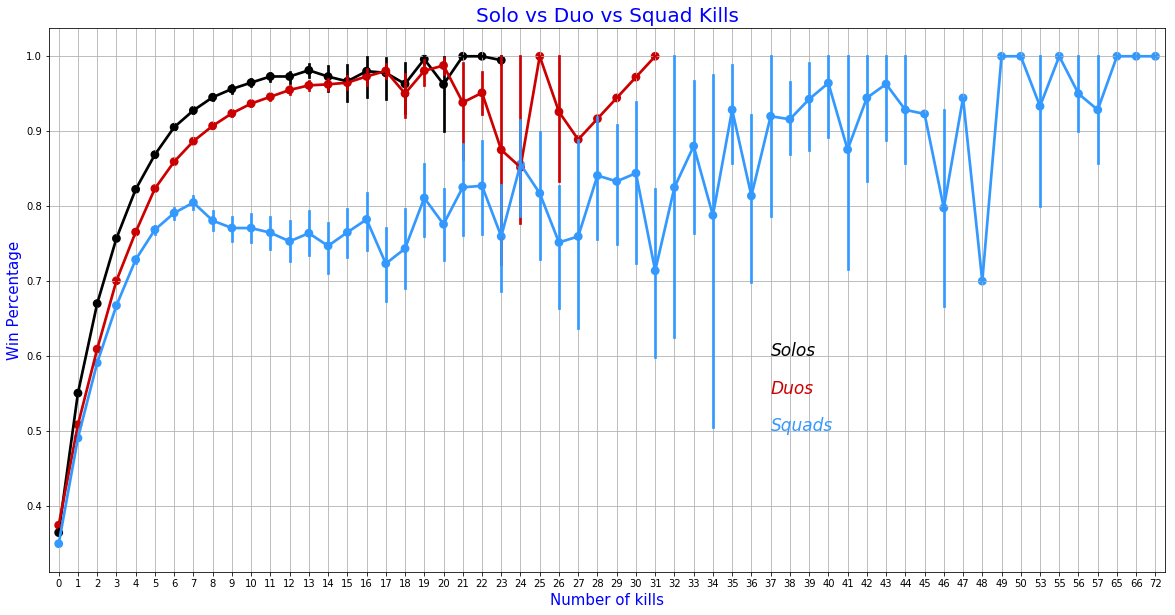

In [72]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

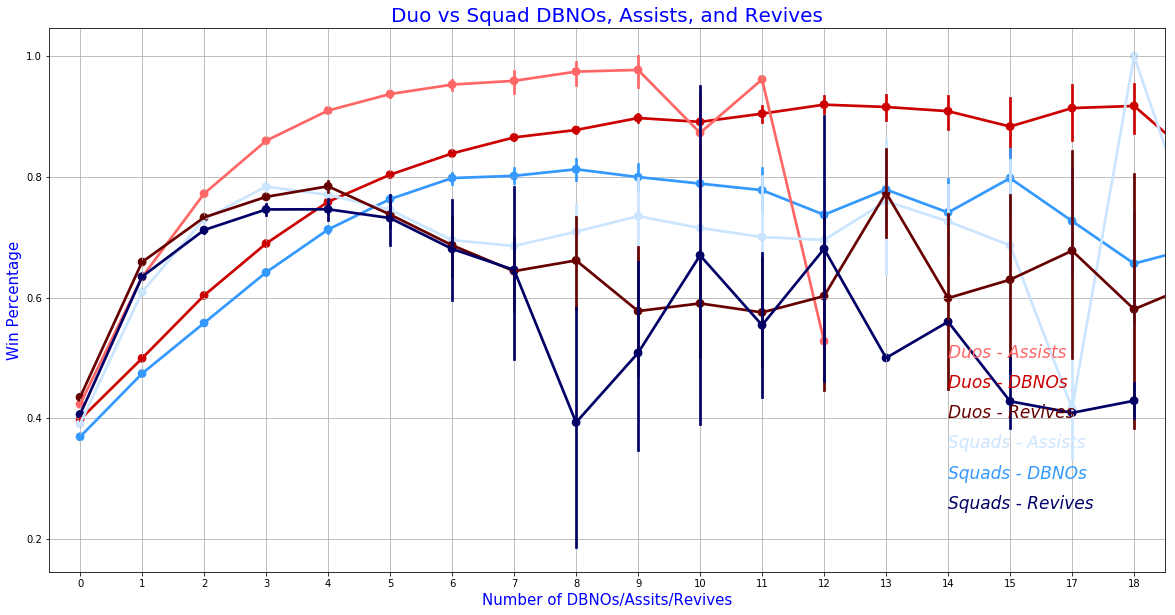

In [73]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF6666',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#000066',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='#FF6666',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Squads - Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()